# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_Q50', 'mf_chm_MIN', 'r_MIN', 'g_MAX', 'contr_b_MAX', 'contr_b_STD'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_Q50,mf_chm_MIN,r_MIN,g_MAX,contr_b_MAX,contr_b_STD
0,6.824,9.240,1912,784,-0.73,2.58,2.33,13.747563,0.445070,13,243,2713.600586,332.963753
1,8.189,9.622,2005,818,0.59,2.92,2.47,15.015374,12.465903,24,248,1793.493042,293.868420
2,8.380,9.589,2001,818,0.78,2.88,2.44,15.384996,13.028298,18,240,1761.097900,272.526176
3,8.137,9.449,2040,833,0.52,2.72,2.55,15.447217,2.128231,15,244,2518.435303,299.595643
4,7.696,9.401,1758,717,0.22,2.83,2.14,17.947407,12.171553,8,243,2525.819336,327.599176


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_Q50     103 non-null    float64
 8   mf_chm_MIN     103 non-null    float64
 9   r_MIN          103 non-null    int64  
 10  g_MAX          103 non-null    int64  
 11  contr_b_MAX    103 non-null    float64
 12  contr_b_STD    103 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 10.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_24029/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_Q50,mf_chm_MIN,r_MIN,g_MAX,contr_b_MAX,contr_b_STD
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,13.422223,3.368496,11.378641,240.572816,2712.352866,349.854034
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,6.805070,4.845054,9.139568,9.358442,864.116297,93.673105
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,1.228214,-0.018586,2.000000,194.000000,832.155518,109.232976
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,8.233259,0.482279,5.000000,236.500000,2123.614868,292.544440
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,13.787443,0.642883,8.000000,243.000000,2601.248047,341.904211
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,17.911694,3.921804,15.000000,247.000000,3045.944336,427.359073
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,29.512907,17.862923,56.000000,253.000000,6252.923340,588.661708


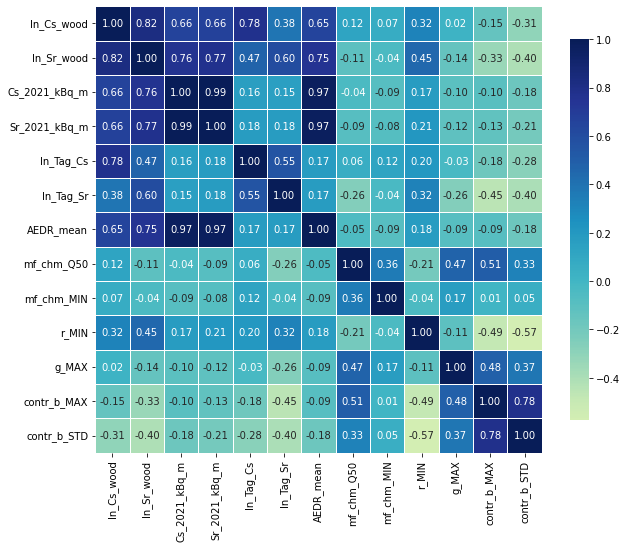

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['mf_chm_Q50', 'mf_chm_MIN', 'r_MIN', 'g_MAX', 'contr_b_MAX', 'contr_b_STD'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,mf_chm_Q50,mf_chm_MIN,r_MIN,g_MAX,contr_b_MAX,contr_b_STD,Random1,Random2,Random3,Random4,Random5
0,13.747563,0.445070,13,243,2713.600586,332.963753,4.883751,10.621985,10.518210,11.136646,9.942818
1,15.015374,12.465903,24,248,1793.493042,293.868420,8.656981,10.423334,8.190332,11.428936,12.894835
2,15.384996,13.028298,18,240,1761.097900,272.526176,10.276259,7.054156,9.127676,8.151724,9.951528
3,15.447217,2.128231,15,244,2518.435303,299.595643,8.118944,6.458574,9.769293,6.112436,9.676050
4,17.947407,12.171553,8,243,2525.819336,327.599176,11.074998,9.053989,11.865449,11.720291,8.261743


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.1529504907168342, 0.13651466107042642, -0.14690965489975105]
    Mean: 0.048
    Std: 0.138

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.73323654 1.05100442 0.7815137 ]
    Mean: 0.855
    Std: 0.140

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5760744748115539, 0.7753542538951423, 0.5235251017177805]
    Mean: 0.625
    Std: 0.108

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.088 (std: 0.143)
Parameters: {'colsample_bytree': 0.7148851149293282, 'gamma': 0.03380226058834068, 'learning_rate': 0.02919110932084836, 'max_depth': 2, 'n_estimators': 91, 'subsample': 0.32967120046510556}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.30380688, 0.66537514, 0.23063579, 0.69380527, 0.37173524,
       0.67065926, 0.22006826, 0.75155568, 0.44791231, 0.25967631,
       0.13859591, 0.37521443, 0.4573278 , 0.23781695, 0.28590407,
       0.28907008, 0.15166411, 0.44883127, 0.24247365, 0.37980785,
       0.22746701, 0.2748517 , 0.14288735, 0.36063752, 0.3986393 ,
       0.2290422 , 0.23322124, 0.24958868, 0.61290059, 0.53745141]), 'std_fit_time': array([0.04475612, 0.159347  , 0.0536583 , 0.12166296, 0.08954571,
       0.19462328, 0.04064609, 0.33727001, 0.07829202, 0.0015643 ,
       0.00095289, 0.07115617, 0.00480163, 0.00342083, 0.00099739,
       0.00572809, 0.00939647, 0.01725238, 0.00359174, 0.0989034 ,
       0.00298254, 0.03906926, 0.00815958, 0.0627136 , 0.0313775 ,
       0.00304238, 0.0090454 , 0.00259207, 0.13752167, 0.39031616]), 'mean_score_time': array([0.00617623, 0.00789657, 0.00698919, 0.00853972, 0.01068153,
       0.00754433, 0.00744262, 0.00685129, 0.00722337, 0.00614018,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7148851149293282
Gamma: 0.03380226058834068
Learning_rate: 0.02919110932084836
Max_depth: 2
N_estimators: 91
Subsample: 0.32967120046510556


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.09837	validation_1-rmse:2.16261
[1]	validation_0-rmse:2.04587	validation_1-rmse:2.10802


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.99384	validation_1-rmse:2.05888
[3]	validation_0-rmse:1.94708	validation_1-rmse:2.01030
[4]	validation_0-rmse:1.90543	validation_1-rmse:1.97078
[5]	validation_0-rmse:1.85379	validation_1-rmse:1.91869
[6]	validation_0-rmse:1.80547	validation_1-rmse:1.87711
[7]	validation_0-rmse:1.76560	validation_1-rmse:1.84132
[8]	validation_0-rmse:1.72499	validation_1-rmse:1.79946
[9]	validation_0-rmse:1.67987	validation_1-rmse:1.75115
[10]	validation_0-rmse:1.65434	validation_1-rmse:1.72943
[11]	validation_0-rmse:1.62302	validation_1-rmse:1.70107
[12]	validation_0-rmse:1.59130	validation_1-rmse:1.66987
[13]	validation_0-rmse:1.55371	validation_1-rmse:1.63384
[14]	validation_0-rmse:1.51952	validation_1-rmse:1.59876
[15]	validation_0-rmse:1.49900	validation_1-rmse:1.57491
[16]	validation_0-rmse:1.46819	validation_1-rmse:1.54208
[17]	validation_0-rmse:1.43287	validation_1-rmse:1.50366
[18]	validation_0-rmse:1.40746	validation_1-rmse:1.47721
[19]	validation_0-rmse:1.37473	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.55290	validation_1-rmse:1.45790
[15]	validation_0-rmse:1.51937	validation_1-rmse:1.42485
[16]	validation_0-rmse:1.48025	validation_1-rmse:1.38734
[17]	validation_0-rmse:1.44947	validation_1-rmse:1.35334
[18]	validation_0-rmse:1.42249	validation_1-rmse:1.32437
[19]	validation_0-rmse:1.39399	validation_1-rmse:1.29996
[20]	validation_0-rmse:1.36554	validation_1-rmse:1.28383
[21]	validation_0-rmse:1.34197	validation_1-rmse:1.26044
[22]	validation_0-rmse:1.31626	validation_1-rmse:1.23193
[23]	validation_0-rmse:1.28954	validation_1-rmse:1.20902
[24]	validation_0-rmse:1.26552	validation_1-rmse:1.19048
[25]	validation_0-rmse:1.24255	validation_1-rmse:1.16520
[26]	validation_0-rmse:1.21915	validation_1-rmse:1.14679
[27]	validation_0-rmse:1.19653	validation_1-rmse:1.12856
[28]	validation_0-rmse:1.17815	validation_1-rmse:1.10523
[29]	validation_0-rmse:1.15578	validation_1-rmse:1.08658
[30]	validation_0-rmse:1.14289	validation_1-rmse:1.07680
[31]	validation_0-rmse:1.12845	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.71846	validation_1-rmse:1.64556
[10]	validation_0-rmse:1.68717	validation_1-rmse:1.62729
[11]	validation_0-rmse:1.65103	validation_1-rmse:1.58359
[12]	validation_0-rmse:1.61536	validation_1-rmse:1.55441
[13]	validation_0-rmse:1.57706	validation_1-rmse:1.52008
[14]	validation_0-rmse:1.54237	validation_1-rmse:1.48476
[15]	validation_0-rmse:1.51176	validation_1-rmse:1.45443
[16]	validation_0-rmse:1.48548	validation_1-rmse:1.42962
[17]	validation_0-rmse:1.45328	validation_1-rmse:1.39104
[18]	validation_0-rmse:1.42392	validation_1-rmse:1.36345
[19]	validation_0-rmse:1.39583	validation_1-rmse:1.34718
[20]	validation_0-rmse:1.36593	validation_1-rmse:1.31908
[21]	validation_0-rmse:1.34297	validation_1-rmse:1.30052
[22]	validation_0-rmse:1.31885	validation_1-rmse:1.28096
[23]	validation_0-rmse:1.29485	validation_1-rmse:1.25946
[24]	validation_0-rmse:1.26858	validation_1-rmse:1.22466
[25]	validation_0-rmse:1.24459	validation_1-rmse:1.20212
[26]	validation_0-rmse:1.21869	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.68606	validation_1-rmse:1.81797
[10]	validation_0-rmse:1.65549	validation_1-rmse:1.78886
[11]	validation_0-rmse:1.61810	validation_1-rmse:1.75618
[12]	validation_0-rmse:1.58616	validation_1-rmse:1.72271
[13]	validation_0-rmse:1.54692	validation_1-rmse:1.68585
[14]	validation_0-rmse:1.51033	validation_1-rmse:1.65197
[15]	validation_0-rmse:1.47733	validation_1-rmse:1.61944
[16]	validation_0-rmse:1.44563	validation_1-rmse:1.59638
[17]	validation_0-rmse:1.41664	validation_1-rmse:1.56887
[18]	validation_0-rmse:1.38271	validation_1-rmse:1.53854
[19]	validation_0-rmse:1.35546	validation_1-rmse:1.51074
[20]	validation_0-rmse:1.33042	validation_1-rmse:1.48025
[21]	validation_0-rmse:1.30507	validation_1-rmse:1.45379
[22]	validation_0-rmse:1.27963	validation_1-rmse:1.43260
[23]	validation_0-rmse:1.26022	validation_1-rmse:1.42058
[24]	validation_0-rmse:1.23347	validation_1-rmse:1.39471
[25]	validation_0-rmse:1.20898	validation_1-rmse:1.37604
[26]	validation_0-rmse:1.18071	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.42438	validation_1-rmse:1.37230
[19]	validation_0-rmse:1.39597	validation_1-rmse:1.35137
[20]	validation_0-rmse:1.36321	validation_1-rmse:1.32154
[21]	validation_0-rmse:1.33796	validation_1-rmse:1.29881
[22]	validation_0-rmse:1.30640	validation_1-rmse:1.27059
[23]	validation_0-rmse:1.28325	validation_1-rmse:1.24553
[24]	validation_0-rmse:1.25441	validation_1-rmse:1.22546
[25]	validation_0-rmse:1.22906	validation_1-rmse:1.20675
[26]	validation_0-rmse:1.20292	validation_1-rmse:1.18154
[27]	validation_0-rmse:1.17262	validation_1-rmse:1.16191
[28]	validation_0-rmse:1.15149	validation_1-rmse:1.14636
[29]	validation_0-rmse:1.12669	validation_1-rmse:1.12516
[30]	validation_0-rmse:1.11191	validation_1-rmse:1.11356
[31]	validation_0-rmse:1.09787	validation_1-rmse:1.10084
[32]	validation_0-rmse:1.07699	validation_1-rmse:1.07979
[33]	validation_0-rmse:1.06332	validation_1-rmse:1.07080
[34]	validation_0-rmse:1.04740	validation_1-rmse:1.06125
[35]	validation_0-rmse:1.02766	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.31910	validation_1-rmse:1.32004
[22]	validation_0-rmse:1.29703	validation_1-rmse:1.29906
[23]	validation_0-rmse:1.26617	validation_1-rmse:1.26837
[24]	validation_0-rmse:1.24093	validation_1-rmse:1.24282
[25]	validation_0-rmse:1.22102	validation_1-rmse:1.22490
[26]	validation_0-rmse:1.20375	validation_1-rmse:1.20970
[27]	validation_0-rmse:1.18013	validation_1-rmse:1.19356
[28]	validation_0-rmse:1.15868	validation_1-rmse:1.16676
[29]	validation_0-rmse:1.14235	validation_1-rmse:1.15540
[30]	validation_0-rmse:1.12395	validation_1-rmse:1.13651
[31]	validation_0-rmse:1.10430	validation_1-rmse:1.11537
[32]	validation_0-rmse:1.08808	validation_1-rmse:1.09839
[33]	validation_0-rmse:1.06614	validation_1-rmse:1.07983
[34]	validation_0-rmse:1.04856	validation_1-rmse:1.06664
[35]	validation_0-rmse:1.03160	validation_1-rmse:1.05124
[36]	validation_0-rmse:1.01300	validation_1-rmse:1.03067
[37]	validation_0-rmse:0.99160	validation_1-rmse:1.01140
[38]	validation_0-rmse:0.97976	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.40822	validation_1-rmse:1.08865
[20]	validation_0-rmse:1.37506	validation_1-rmse:1.06573
[21]	validation_0-rmse:1.34265	validation_1-rmse:1.04574
[22]	validation_0-rmse:1.31638	validation_1-rmse:1.03194
[23]	validation_0-rmse:1.28654	validation_1-rmse:1.01811
[24]	validation_0-rmse:1.25963	validation_1-rmse:1.00551
[25]	validation_0-rmse:1.23093	validation_1-rmse:0.99351
[26]	validation_0-rmse:1.20547	validation_1-rmse:0.97853
[27]	validation_0-rmse:1.18015	validation_1-rmse:0.96456
[28]	validation_0-rmse:1.16054	validation_1-rmse:0.95294
[29]	validation_0-rmse:1.13740	validation_1-rmse:0.95068
[30]	validation_0-rmse:1.11679	validation_1-rmse:0.93766
[31]	validation_0-rmse:1.09687	validation_1-rmse:0.93209
[32]	validation_0-rmse:1.07990	validation_1-rmse:0.92291
[33]	validation_0-rmse:1.05743	validation_1-rmse:0.91466
[34]	validation_0-rmse:1.03489	validation_1-rmse:0.90846
[35]	validation_0-rmse:1.02013	validation_1-rmse:0.90535
[36]	validation_0-rmse:1.00374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.55869	validation_1-rmse:1.46338
[15]	validation_0-rmse:1.52301	validation_1-rmse:1.42915
[16]	validation_0-rmse:1.48728	validation_1-rmse:1.39509
[17]	validation_0-rmse:1.45299	validation_1-rmse:1.35808
[18]	validation_0-rmse:1.42800	validation_1-rmse:1.33497
[19]	validation_0-rmse:1.39584	validation_1-rmse:1.30219
[20]	validation_0-rmse:1.36765	validation_1-rmse:1.27682
[21]	validation_0-rmse:1.33869	validation_1-rmse:1.24940
[22]	validation_0-rmse:1.31252	validation_1-rmse:1.22935
[23]	validation_0-rmse:1.28689	validation_1-rmse:1.20152
[24]	validation_0-rmse:1.25971	validation_1-rmse:1.16872
[25]	validation_0-rmse:1.23839	validation_1-rmse:1.14666
[26]	validation_0-rmse:1.22084	validation_1-rmse:1.12951
[27]	validation_0-rmse:1.19632	validation_1-rmse:1.10573
[28]	validation_0-rmse:1.17844	validation_1-rmse:1.09015
[29]	validation_0-rmse:1.16311	validation_1-rmse:1.07364
[30]	validation_0-rmse:1.15040	validation_1-rmse:1.06311
[31]	validation_0-rmse:1.13600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.43892	validation_1-rmse:1.31895
[19]	validation_0-rmse:1.41005	validation_1-rmse:1.28721
[20]	validation_0-rmse:1.38146	validation_1-rmse:1.26597
[21]	validation_0-rmse:1.35559	validation_1-rmse:1.24967
[22]	validation_0-rmse:1.33379	validation_1-rmse:1.23047
[23]	validation_0-rmse:1.30729	validation_1-rmse:1.20689
[24]	validation_0-rmse:1.27668	validation_1-rmse:1.17600
[25]	validation_0-rmse:1.25270	validation_1-rmse:1.16287
[26]	validation_0-rmse:1.22725	validation_1-rmse:1.13433
[27]	validation_0-rmse:1.20330	validation_1-rmse:1.11089
[28]	validation_0-rmse:1.18475	validation_1-rmse:1.09813
[29]	validation_0-rmse:1.16751	validation_1-rmse:1.09101
[30]	validation_0-rmse:1.14866	validation_1-rmse:1.08121
[31]	validation_0-rmse:1.12744	validation_1-rmse:1.06946
[32]	validation_0-rmse:1.11055	validation_1-rmse:1.05789
[33]	validation_0-rmse:1.09658	validation_1-rmse:1.05256
[34]	validation_0-rmse:1.07165	validation_1-rmse:1.03362
[35]	validation_0-rmse:1.04887	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.36088	validation_1-rmse:1.04261
[21]	validation_0-rmse:1.32932	validation_1-rmse:1.01825
[22]	validation_0-rmse:1.30487	validation_1-rmse:0.99735
[23]	validation_0-rmse:1.27811	validation_1-rmse:0.97812
[24]	validation_0-rmse:1.25432	validation_1-rmse:0.95924
[25]	validation_0-rmse:1.23313	validation_1-rmse:0.94461
[26]	validation_0-rmse:1.20648	validation_1-rmse:0.92382
[27]	validation_0-rmse:1.18370	validation_1-rmse:0.90653
[28]	validation_0-rmse:1.16326	validation_1-rmse:0.88751
[29]	validation_0-rmse:1.14553	validation_1-rmse:0.87424
[30]	validation_0-rmse:1.12598	validation_1-rmse:0.85551
[31]	validation_0-rmse:1.10490	validation_1-rmse:0.83795
[32]	validation_0-rmse:1.09023	validation_1-rmse:0.82402
[33]	validation_0-rmse:1.06885	validation_1-rmse:0.81369
[34]	validation_0-rmse:1.05185	validation_1-rmse:0.80765
[35]	validation_0-rmse:1.03238	validation_1-rmse:0.79165
[36]	validation_0-rmse:1.01715	validation_1-rmse:0.78455
[37]	validation_0-rmse:1.00208	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.38479	validation_1-rmse:1.38185
[20]	validation_0-rmse:1.36288	validation_1-rmse:1.36280
[21]	validation_0-rmse:1.34673	validation_1-rmse:1.35030
[22]	validation_0-rmse:1.32429	validation_1-rmse:1.33604
[23]	validation_0-rmse:1.29841	validation_1-rmse:1.32162
[24]	validation_0-rmse:1.26792	validation_1-rmse:1.28561
[25]	validation_0-rmse:1.24438	validation_1-rmse:1.26525
[26]	validation_0-rmse:1.23126	validation_1-rmse:1.25254
[27]	validation_0-rmse:1.20877	validation_1-rmse:1.23173
[28]	validation_0-rmse:1.18613	validation_1-rmse:1.21490
[29]	validation_0-rmse:1.16576	validation_1-rmse:1.19858
[30]	validation_0-rmse:1.14010	validation_1-rmse:1.17048
[31]	validation_0-rmse:1.11606	validation_1-rmse:1.14956
[32]	validation_0-rmse:1.09602	validation_1-rmse:1.13420
[33]	validation_0-rmse:1.07570	validation_1-rmse:1.11460
[34]	validation_0-rmse:1.05560	validation_1-rmse:1.09868
[35]	validation_0-rmse:1.04276	validation_1-rmse:1.08079
[36]	validation_0-rmse:1.02486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.31933	validation_1-rmse:1.49364
[21]	validation_0-rmse:1.29589	validation_1-rmse:1.47404
[22]	validation_0-rmse:1.27676	validation_1-rmse:1.45546
[23]	validation_0-rmse:1.24808	validation_1-rmse:1.42566
[24]	validation_0-rmse:1.22414	validation_1-rmse:1.40637
[25]	validation_0-rmse:1.20128	validation_1-rmse:1.38276
[26]	validation_0-rmse:1.18086	validation_1-rmse:1.36798
[27]	validation_0-rmse:1.15510	validation_1-rmse:1.34010
[28]	validation_0-rmse:1.13515	validation_1-rmse:1.32111
[29]	validation_0-rmse:1.11551	validation_1-rmse:1.29865
[30]	validation_0-rmse:1.09276	validation_1-rmse:1.27718
[31]	validation_0-rmse:1.07588	validation_1-rmse:1.26349
[32]	validation_0-rmse:1.05735	validation_1-rmse:1.24364
[33]	validation_0-rmse:1.03786	validation_1-rmse:1.22916
[34]	validation_0-rmse:1.02388	validation_1-rmse:1.21491
[35]	validation_0-rmse:1.00714	validation_1-rmse:1.19957
[36]	validation_0-rmse:0.99228	validation_1-rmse:1.18545
[37]	validation_0-rmse:0.97666	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.39836	validation_1-rmse:1.32333
[20]	validation_0-rmse:1.36344	validation_1-rmse:1.28968
[21]	validation_0-rmse:1.33464	validation_1-rmse:1.26335
[22]	validation_0-rmse:1.30238	validation_1-rmse:1.24101
[23]	validation_0-rmse:1.27431	validation_1-rmse:1.21539
[24]	validation_0-rmse:1.24846	validation_1-rmse:1.19248
[25]	validation_0-rmse:1.22249	validation_1-rmse:1.17103
[26]	validation_0-rmse:1.19502	validation_1-rmse:1.14452
[27]	validation_0-rmse:1.16901	validation_1-rmse:1.12395
[28]	validation_0-rmse:1.14762	validation_1-rmse:1.10710
[29]	validation_0-rmse:1.12142	validation_1-rmse:1.08570
[30]	validation_0-rmse:1.10097	validation_1-rmse:1.07144
[31]	validation_0-rmse:1.08215	validation_1-rmse:1.05586
[32]	validation_0-rmse:1.06753	validation_1-rmse:1.04190
[33]	validation_0-rmse:1.04980	validation_1-rmse:1.03255
[34]	validation_0-rmse:1.02864	validation_1-rmse:1.01939
[35]	validation_0-rmse:1.01000	validation_1-rmse:1.00484
[36]	validation_0-rmse:0.99164	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.45248	validation_1-rmse:1.06247
[19]	validation_0-rmse:1.42115	validation_1-rmse:1.04941
[20]	validation_0-rmse:1.39003	validation_1-rmse:1.03133
[21]	validation_0-rmse:1.36154	validation_1-rmse:1.00859
[22]	validation_0-rmse:1.33484	validation_1-rmse:0.98234
[23]	validation_0-rmse:1.30098	validation_1-rmse:0.95801
[24]	validation_0-rmse:1.27899	validation_1-rmse:0.94386
[25]	validation_0-rmse:1.25486	validation_1-rmse:0.93263
[26]	validation_0-rmse:1.22741	validation_1-rmse:0.91433
[27]	validation_0-rmse:1.20056	validation_1-rmse:0.89201
[28]	validation_0-rmse:1.17395	validation_1-rmse:0.88099
[29]	validation_0-rmse:1.14336	validation_1-rmse:0.87113
[30]	validation_0-rmse:1.12546	validation_1-rmse:0.86165
[31]	validation_0-rmse:1.10383	validation_1-rmse:0.85061
[32]	validation_0-rmse:1.08663	validation_1-rmse:0.84146
[33]	validation_0-rmse:1.06578	validation_1-rmse:0.83147
[34]	validation_0-rmse:1.04706	validation_1-rmse:0.82514
[35]	validation_0-rmse:1.03198	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.43257	validation_1-rmse:1.14006
[19]	validation_0-rmse:1.40534	validation_1-rmse:1.11843
[20]	validation_0-rmse:1.37493	validation_1-rmse:1.09667
[21]	validation_0-rmse:1.34376	validation_1-rmse:1.07581
[22]	validation_0-rmse:1.31829	validation_1-rmse:1.05596
[23]	validation_0-rmse:1.28799	validation_1-rmse:1.03518
[24]	validation_0-rmse:1.26861	validation_1-rmse:1.02537
[25]	validation_0-rmse:1.24628	validation_1-rmse:1.01286
[26]	validation_0-rmse:1.21588	validation_1-rmse:0.99617
[27]	validation_0-rmse:1.19357	validation_1-rmse:0.98091
[28]	validation_0-rmse:1.17151	validation_1-rmse:0.96960
[29]	validation_0-rmse:1.15037	validation_1-rmse:0.95750
[30]	validation_0-rmse:1.12787	validation_1-rmse:0.94656
[31]	validation_0-rmse:1.10331	validation_1-rmse:0.93218
[32]	validation_0-rmse:1.08019	validation_1-rmse:0.92288
[33]	validation_0-rmse:1.06045	validation_1-rmse:0.91188
[34]	validation_0-rmse:1.04344	validation_1-rmse:0.90335
[35]	validation_0-rmse:1.02348	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.40467	validation_1-rmse:1.43170
[19]	validation_0-rmse:1.37558	validation_1-rmse:1.40716
[20]	validation_0-rmse:1.34483	validation_1-rmse:1.38453
[21]	validation_0-rmse:1.31789	validation_1-rmse:1.36586
[22]	validation_0-rmse:1.28897	validation_1-rmse:1.34389
[23]	validation_0-rmse:1.25911	validation_1-rmse:1.31774
[24]	validation_0-rmse:1.23967	validation_1-rmse:1.30621
[25]	validation_0-rmse:1.21586	validation_1-rmse:1.29117
[26]	validation_0-rmse:1.19265	validation_1-rmse:1.27241
[27]	validation_0-rmse:1.17486	validation_1-rmse:1.25733
[28]	validation_0-rmse:1.14965	validation_1-rmse:1.23464
[29]	validation_0-rmse:1.13097	validation_1-rmse:1.21942
[30]	validation_0-rmse:1.11231	validation_1-rmse:1.20024
[31]	validation_0-rmse:1.09658	validation_1-rmse:1.18957
[32]	validation_0-rmse:1.07928	validation_1-rmse:1.17973
[33]	validation_0-rmse:1.05595	validation_1-rmse:1.16402
[34]	validation_0-rmse:1.03823	validation_1-rmse:1.14714
[35]	validation_0-rmse:1.02413	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.42586	validation_1-rmse:1.36518
[19]	validation_0-rmse:1.39555	validation_1-rmse:1.33752
[20]	validation_0-rmse:1.36762	validation_1-rmse:1.31403
[21]	validation_0-rmse:1.33770	validation_1-rmse:1.28778
[22]	validation_0-rmse:1.30580	validation_1-rmse:1.25672
[23]	validation_0-rmse:1.27957	validation_1-rmse:1.23472
[24]	validation_0-rmse:1.26044	validation_1-rmse:1.22044
[25]	validation_0-rmse:1.23820	validation_1-rmse:1.20064
[26]	validation_0-rmse:1.21160	validation_1-rmse:1.17866
[27]	validation_0-rmse:1.18500	validation_1-rmse:1.15895
[28]	validation_0-rmse:1.16298	validation_1-rmse:1.14244
[29]	validation_0-rmse:1.13698	validation_1-rmse:1.12187
[30]	validation_0-rmse:1.11624	validation_1-rmse:1.10537
[31]	validation_0-rmse:1.09243	validation_1-rmse:1.08552
[32]	validation_0-rmse:1.07523	validation_1-rmse:1.07304
[33]	validation_0-rmse:1.05454	validation_1-rmse:1.05475
[34]	validation_0-rmse:1.04059	validation_1-rmse:1.04323
[35]	validation_0-rmse:1.02065	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.29328	validation_1-rmse:1.60348
[21]	validation_0-rmse:1.26682	validation_1-rmse:1.58615
[22]	validation_0-rmse:1.23613	validation_1-rmse:1.55557
[23]	validation_0-rmse:1.21220	validation_1-rmse:1.53093
[24]	validation_0-rmse:1.19541	validation_1-rmse:1.51474
[25]	validation_0-rmse:1.17151	validation_1-rmse:1.49741
[26]	validation_0-rmse:1.14572	validation_1-rmse:1.46968
[27]	validation_0-rmse:1.11708	validation_1-rmse:1.43865
[28]	validation_0-rmse:1.09881	validation_1-rmse:1.42411
[29]	validation_0-rmse:1.08532	validation_1-rmse:1.41330
[30]	validation_0-rmse:1.06693	validation_1-rmse:1.39262
[31]	validation_0-rmse:1.04428	validation_1-rmse:1.37629
[32]	validation_0-rmse:1.02816	validation_1-rmse:1.35773
[33]	validation_0-rmse:1.00773	validation_1-rmse:1.33631
[34]	validation_0-rmse:0.99005	validation_1-rmse:1.31613
[35]	validation_0-rmse:0.97464	validation_1-rmse:1.30696
[36]	validation_0-rmse:0.95430	validation_1-rmse:1.28841
[37]	validation_0-rmse:0.93725	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.41114	validation_1-rmse:1.65766
[18]	validation_0-rmse:1.39153	validation_1-rmse:1.63268
[19]	validation_0-rmse:1.36029	validation_1-rmse:1.60069
[20]	validation_0-rmse:1.33288	validation_1-rmse:1.56688
[21]	validation_0-rmse:1.30738	validation_1-rmse:1.54218
[22]	validation_0-rmse:1.28231	validation_1-rmse:1.51718
[23]	validation_0-rmse:1.26379	validation_1-rmse:1.49292
[24]	validation_0-rmse:1.23408	validation_1-rmse:1.45847
[25]	validation_0-rmse:1.20731	validation_1-rmse:1.42676
[26]	validation_0-rmse:1.18974	validation_1-rmse:1.40644
[27]	validation_0-rmse:1.17019	validation_1-rmse:1.38617
[28]	validation_0-rmse:1.14293	validation_1-rmse:1.35853
[29]	validation_0-rmse:1.12135	validation_1-rmse:1.33164
[30]	validation_0-rmse:1.10153	validation_1-rmse:1.30938
[31]	validation_0-rmse:1.08319	validation_1-rmse:1.29024
[32]	validation_0-rmse:1.07143	validation_1-rmse:1.28009
[33]	validation_0-rmse:1.05412	validation_1-rmse:1.26130
[34]	validation_0-rmse:1.03609	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.43037	validation_1-rmse:1.40033
[18]	validation_0-rmse:1.40303	validation_1-rmse:1.37681
[19]	validation_0-rmse:1.37076	validation_1-rmse:1.35053
[20]	validation_0-rmse:1.33706	validation_1-rmse:1.32098
[21]	validation_0-rmse:1.31252	validation_1-rmse:1.30502
[22]	validation_0-rmse:1.28418	validation_1-rmse:1.28053
[23]	validation_0-rmse:1.25867	validation_1-rmse:1.25866
[24]	validation_0-rmse:1.23260	validation_1-rmse:1.23488
[25]	validation_0-rmse:1.21029	validation_1-rmse:1.21503
[26]	validation_0-rmse:1.18718	validation_1-rmse:1.19432
[27]	validation_0-rmse:1.16812	validation_1-rmse:1.17985
[28]	validation_0-rmse:1.14741	validation_1-rmse:1.15980
[29]	validation_0-rmse:1.12765	validation_1-rmse:1.14624
[30]	validation_0-rmse:1.10415	validation_1-rmse:1.13254
[31]	validation_0-rmse:1.08033	validation_1-rmse:1.11430
[32]	validation_0-rmse:1.06002	validation_1-rmse:1.09584
[33]	validation_0-rmse:1.04081	validation_1-rmse:1.08400
[34]	validation_0-rmse:1.01821	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.42009	validation_1-rmse:1.38949
[19]	validation_0-rmse:1.38722	validation_1-rmse:1.36019
[20]	validation_0-rmse:1.35985	validation_1-rmse:1.33419
[21]	validation_0-rmse:1.33995	validation_1-rmse:1.31786
[22]	validation_0-rmse:1.30889	validation_1-rmse:1.29069
[23]	validation_0-rmse:1.28825	validation_1-rmse:1.27120
[24]	validation_0-rmse:1.25836	validation_1-rmse:1.24351
[25]	validation_0-rmse:1.23464	validation_1-rmse:1.22451
[26]	validation_0-rmse:1.21392	validation_1-rmse:1.20953
[27]	validation_0-rmse:1.18879	validation_1-rmse:1.19002
[28]	validation_0-rmse:1.16320	validation_1-rmse:1.16391
[29]	validation_0-rmse:1.14112	validation_1-rmse:1.14492
[30]	validation_0-rmse:1.11529	validation_1-rmse:1.12621
[31]	validation_0-rmse:1.09296	validation_1-rmse:1.10975
[32]	validation_0-rmse:1.07930	validation_1-rmse:1.10012
[33]	validation_0-rmse:1.05902	validation_1-rmse:1.08069
[34]	validation_0-rmse:1.03972	validation_1-rmse:1.06746
[35]	validation_0-rmse:1.02171	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.37982	validation_1-rmse:1.43438
[20]	validation_0-rmse:1.35287	validation_1-rmse:1.40538
[21]	validation_0-rmse:1.32654	validation_1-rmse:1.37930
[22]	validation_0-rmse:1.30541	validation_1-rmse:1.36220
[23]	validation_0-rmse:1.27620	validation_1-rmse:1.32998
[24]	validation_0-rmse:1.25331	validation_1-rmse:1.30369
[25]	validation_0-rmse:1.23168	validation_1-rmse:1.28148
[26]	validation_0-rmse:1.21218	validation_1-rmse:1.26666
[27]	validation_0-rmse:1.19211	validation_1-rmse:1.24953
[28]	validation_0-rmse:1.17034	validation_1-rmse:1.22942
[29]	validation_0-rmse:1.14477	validation_1-rmse:1.20333
[30]	validation_0-rmse:1.12734	validation_1-rmse:1.18444
[31]	validation_0-rmse:1.11070	validation_1-rmse:1.16857
[32]	validation_0-rmse:1.09201	validation_1-rmse:1.15027
[33]	validation_0-rmse:1.07630	validation_1-rmse:1.13534
[34]	validation_0-rmse:1.05747	validation_1-rmse:1.11555
[35]	validation_0-rmse:1.03878	validation_1-rmse:1.09525
[36]	validation_0-rmse:1.02595	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.39922	validation_1-rmse:1.42575
[19]	validation_0-rmse:1.37062	validation_1-rmse:1.40554
[20]	validation_0-rmse:1.34838	validation_1-rmse:1.39358
[21]	validation_0-rmse:1.31762	validation_1-rmse:1.37283
[22]	validation_0-rmse:1.28786	validation_1-rmse:1.35351
[23]	validation_0-rmse:1.25853	validation_1-rmse:1.33242
[24]	validation_0-rmse:1.23210	validation_1-rmse:1.31634
[25]	validation_0-rmse:1.20936	validation_1-rmse:1.29847
[26]	validation_0-rmse:1.18373	validation_1-rmse:1.28197
[27]	validation_0-rmse:1.15942	validation_1-rmse:1.27030
[28]	validation_0-rmse:1.13308	validation_1-rmse:1.25556
[29]	validation_0-rmse:1.11430	validation_1-rmse:1.24193
[30]	validation_0-rmse:1.09240	validation_1-rmse:1.22425
[31]	validation_0-rmse:1.07363	validation_1-rmse:1.21431
[32]	validation_0-rmse:1.05821	validation_1-rmse:1.20410
[33]	validation_0-rmse:1.03847	validation_1-rmse:1.19056
[34]	validation_0-rmse:1.01280	validation_1-rmse:1.17546
[35]	validation_0-rmse:1.00234	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.33646	validation_1-rmse:1.48762
[21]	validation_0-rmse:1.30483	validation_1-rmse:1.45770
[22]	validation_0-rmse:1.27914	validation_1-rmse:1.43475
[23]	validation_0-rmse:1.25420	validation_1-rmse:1.40742
[24]	validation_0-rmse:1.22956	validation_1-rmse:1.37796
[25]	validation_0-rmse:1.20839	validation_1-rmse:1.35578
[26]	validation_0-rmse:1.18742	validation_1-rmse:1.33003
[27]	validation_0-rmse:1.16125	validation_1-rmse:1.30430
[28]	validation_0-rmse:1.14012	validation_1-rmse:1.28338
[29]	validation_0-rmse:1.12046	validation_1-rmse:1.26664
[30]	validation_0-rmse:1.09859	validation_1-rmse:1.24537
[31]	validation_0-rmse:1.07864	validation_1-rmse:1.22167
[32]	validation_0-rmse:1.06088	validation_1-rmse:1.20348
[33]	validation_0-rmse:1.03955	validation_1-rmse:1.18240
[34]	validation_0-rmse:1.01979	validation_1-rmse:1.16377
[35]	validation_0-rmse:0.99963	validation_1-rmse:1.14807
[36]	validation_0-rmse:0.98265	validation_1-rmse:1.12985
[37]	validation_0-rmse:0.96900	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.44216	validation_1-rmse:1.54689
[17]	validation_0-rmse:1.41196	validation_1-rmse:1.51338
[18]	validation_0-rmse:1.38365	validation_1-rmse:1.48071
[19]	validation_0-rmse:1.35636	validation_1-rmse:1.45329
[20]	validation_0-rmse:1.33541	validation_1-rmse:1.43385
[21]	validation_0-rmse:1.30898	validation_1-rmse:1.40454
[22]	validation_0-rmse:1.28562	validation_1-rmse:1.38072
[23]	validation_0-rmse:1.26294	validation_1-rmse:1.35742
[24]	validation_0-rmse:1.24058	validation_1-rmse:1.33351
[25]	validation_0-rmse:1.22068	validation_1-rmse:1.31981
[26]	validation_0-rmse:1.20597	validation_1-rmse:1.30116
[27]	validation_0-rmse:1.17924	validation_1-rmse:1.27393
[28]	validation_0-rmse:1.15783	validation_1-rmse:1.24981
[29]	validation_0-rmse:1.14185	validation_1-rmse:1.23586
[30]	validation_0-rmse:1.11754	validation_1-rmse:1.21057
[31]	validation_0-rmse:1.09596	validation_1-rmse:1.18661
[32]	validation_0-rmse:1.07734	validation_1-rmse:1.16394
[33]	validation_0-rmse:1.05662	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.23525	validation_1-rmse:1.56483
[22]	validation_0-rmse:1.21039	validation_1-rmse:1.54296
[23]	validation_0-rmse:1.18154	validation_1-rmse:1.51999
[24]	validation_0-rmse:1.15440	validation_1-rmse:1.49809
[25]	validation_0-rmse:1.13472	validation_1-rmse:1.48316
[26]	validation_0-rmse:1.10894	validation_1-rmse:1.46568
[27]	validation_0-rmse:1.08223	validation_1-rmse:1.44770
[28]	validation_0-rmse:1.05756	validation_1-rmse:1.43370
[29]	validation_0-rmse:1.03256	validation_1-rmse:1.41186
[30]	validation_0-rmse:1.01096	validation_1-rmse:1.39357
[31]	validation_0-rmse:0.99115	validation_1-rmse:1.37770
[32]	validation_0-rmse:0.97165	validation_1-rmse:1.36489
[33]	validation_0-rmse:0.95202	validation_1-rmse:1.35425
[34]	validation_0-rmse:0.93341	validation_1-rmse:1.34081
[35]	validation_0-rmse:0.91840	validation_1-rmse:1.32795
[36]	validation_0-rmse:0.90390	validation_1-rmse:1.31833
[37]	validation_0-rmse:0.88912	validation_1-rmse:1.30871
[38]	validation_0-rmse:0.87269	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.26092	validation_1-rmse:1.41847
[23]	validation_0-rmse:1.23664	validation_1-rmse:1.40131
[24]	validation_0-rmse:1.21438	validation_1-rmse:1.37748
[25]	validation_0-rmse:1.18640	validation_1-rmse:1.35185
[26]	validation_0-rmse:1.16307	validation_1-rmse:1.32897
[27]	validation_0-rmse:1.13681	validation_1-rmse:1.30826
[28]	validation_0-rmse:1.11535	validation_1-rmse:1.29269
[29]	validation_0-rmse:1.09468	validation_1-rmse:1.27828
[30]	validation_0-rmse:1.08109	validation_1-rmse:1.26298
[31]	validation_0-rmse:1.06026	validation_1-rmse:1.24536
[32]	validation_0-rmse:1.03552	validation_1-rmse:1.22778
[33]	validation_0-rmse:1.01770	validation_1-rmse:1.21932
[34]	validation_0-rmse:0.99441	validation_1-rmse:1.19782
[35]	validation_0-rmse:0.97624	validation_1-rmse:1.18154
[36]	validation_0-rmse:0.96192	validation_1-rmse:1.17276
[37]	validation_0-rmse:0.95370	validation_1-rmse:1.16954
[38]	validation_0-rmse:0.93634	validation_1-rmse:1.15688
[39]	validation_0-rmse:0.91932	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.34222	validation_1-rmse:1.42520
[21]	validation_0-rmse:1.32299	validation_1-rmse:1.40263
[22]	validation_0-rmse:1.29414	validation_1-rmse:1.37863
[23]	validation_0-rmse:1.26591	validation_1-rmse:1.35108
[24]	validation_0-rmse:1.23988	validation_1-rmse:1.32344
[25]	validation_0-rmse:1.21683	validation_1-rmse:1.30136
[26]	validation_0-rmse:1.19440	validation_1-rmse:1.27666
[27]	validation_0-rmse:1.17350	validation_1-rmse:1.25619
[28]	validation_0-rmse:1.15041	validation_1-rmse:1.23303
[29]	validation_0-rmse:1.12639	validation_1-rmse:1.21081
[30]	validation_0-rmse:1.11222	validation_1-rmse:1.19740
[31]	validation_0-rmse:1.09254	validation_1-rmse:1.17707
[32]	validation_0-rmse:1.07424	validation_1-rmse:1.15830
[33]	validation_0-rmse:1.05164	validation_1-rmse:1.13788
[34]	validation_0-rmse:1.03798	validation_1-rmse:1.12302
[35]	validation_0-rmse:1.01502	validation_1-rmse:1.10126
[36]	validation_0-rmse:0.99654	validation_1-rmse:1.08353
[37]	validation_0-rmse:0.98512	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.35194	validation_1-rmse:1.26149
[22]	validation_0-rmse:1.31999	validation_1-rmse:1.23306
[23]	validation_0-rmse:1.29763	validation_1-rmse:1.21250
[24]	validation_0-rmse:1.26853	validation_1-rmse:1.18358
[25]	validation_0-rmse:1.25021	validation_1-rmse:1.16699
[26]	validation_0-rmse:1.22382	validation_1-rmse:1.14436
[27]	validation_0-rmse:1.20039	validation_1-rmse:1.12511
[28]	validation_0-rmse:1.17751	validation_1-rmse:1.10371
[29]	validation_0-rmse:1.15247	validation_1-rmse:1.08303
[30]	validation_0-rmse:1.12703	validation_1-rmse:1.06721
[31]	validation_0-rmse:1.10651	validation_1-rmse:1.04789
[32]	validation_0-rmse:1.08826	validation_1-rmse:1.03200
[33]	validation_0-rmse:1.06761	validation_1-rmse:1.01592
[34]	validation_0-rmse:1.04683	validation_1-rmse:0.99708
[35]	validation_0-rmse:1.02856	validation_1-rmse:0.98436
[36]	validation_0-rmse:1.00733	validation_1-rmse:0.96599
[37]	validation_0-rmse:0.98937	validation_1-rmse:0.95271
[38]	validation_0-rmse:0.97320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.36852	validation_1-rmse:1.50339
[20]	validation_0-rmse:1.34754	validation_1-rmse:1.48579
[21]	validation_0-rmse:1.32176	validation_1-rmse:1.46605
[22]	validation_0-rmse:1.30471	validation_1-rmse:1.44799
[23]	validation_0-rmse:1.27629	validation_1-rmse:1.41994
[24]	validation_0-rmse:1.24919	validation_1-rmse:1.39242
[25]	validation_0-rmse:1.22901	validation_1-rmse:1.37341
[26]	validation_0-rmse:1.20530	validation_1-rmse:1.34990
[27]	validation_0-rmse:1.18787	validation_1-rmse:1.33410
[28]	validation_0-rmse:1.16550	validation_1-rmse:1.31267
[29]	validation_0-rmse:1.13988	validation_1-rmse:1.28496
[30]	validation_0-rmse:1.12993	validation_1-rmse:1.27693
[31]	validation_0-rmse:1.11423	validation_1-rmse:1.26004
[32]	validation_0-rmse:1.09033	validation_1-rmse:1.23769
[33]	validation_0-rmse:1.07432	validation_1-rmse:1.22385
[34]	validation_0-rmse:1.05612	validation_1-rmse:1.20175
[35]	validation_0-rmse:1.04329	validation_1-rmse:1.19300
[36]	validation_0-rmse:1.02582	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 84.1, median: 89.0,
 pred. interval (P(0.025)-P(0.975)): 49.625-90.0, 
 conf. interval (p-value=0.95): 84.845-89.436 
***
Aggregate bias statistic: 
 mean: -4.055, median: -4.408,
 pred. interval (P(0.025)-P(0.975)): -8.419-1.013, 
 conf. interval (p-value=0.95): -5.189--2.969 
***
Aggregate RMSE statistic: 
 mean: 0.798, median: 0.773, pred. interval (P(0.025)-P(0.975)): 0.632-1.029, 
 conf. interval (p-value=0.95): 0.745-0.822 
***
Aggregate MSE statistic: 
 mean: 0.648, median: 0.598, pred. interval (P(0.025)-P(0.975)): 0.4-1.061, 
 conf. interval (p-value=0.95): 0.557-0.679 
***
Aggregate R^2 statistic: 
 mean: 0.143, median: 0.199, pred. interval (P(0.025)-P(0.975)): -0.146-0.394, 
 conf. interval (p-value=0.95): 0.106-0.241 
***
Aggregate bias(%) statistic: 
 mean: -1.616, median: -4.408, pred. interval (P(0.025)-P(0.975)): -3.164-0.483, 
 conf. interval (p-value=0.95): -2.14--1.28 
***
Aggregate RMSE(%) statistic: 
 mean:

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.10838
[1]	validation_0-rmse:2.05053


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2.00212
[3]	validation_0-rmse:1.96149
[4]	validation_0-rmse:1.91643
[5]	validation_0-rmse:1.87264
[6]	validation_0-rmse:1.83137
[7]	validation_0-rmse:1.79067
[8]	validation_0-rmse:1.75004
[9]	validation_0-rmse:1.70997
[10]	validation_0-rmse:1.67073
[11]	validation_0-rmse:1.63964
[12]	validation_0-rmse:1.60416
[13]	validation_0-rmse:1.57675
[14]	validation_0-rmse:1.54712
[15]	validation_0-rmse:1.51548
[16]	validation_0-rmse:1.47553
[17]	validation_0-rmse:1.44707
[18]	validation_0-rmse:1.41465
[19]	validation_0-rmse:1.38287
[20]	validation_0-rmse:1.35618
[21]	validation_0-rmse:1.32670
[22]	validation_0-rmse:1.29587
[23]	validation_0-rmse:1.27247
[24]	validation_0-rmse:1.24994
[25]	validation_0-rmse:1.22037
[26]	validation_0-rmse:1.19504
[27]	validation_0-rmse:1.17076
[28]	validation_0-rmse:1.14838
[29]	validation_0-rmse:1.13663
[30]	validation_0-rmse:1.11048
[31]	validation_0-rmse:1.09218
[32]	validation_0-rmse:1.07345
[33]	validation_0-rmse:1.05560
[34]	validation_

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 90


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

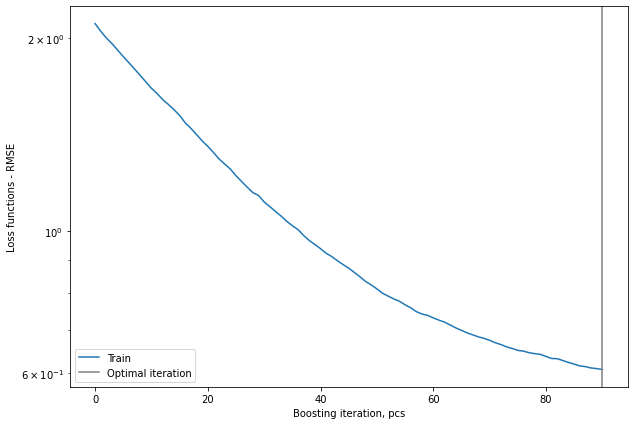

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.2
Relative bias(%):  -7.37
RMSE: 0.6
Relative RMSE(%):  0.247
MSE: 0.4
R square: 54.4%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.209
a1: 0.438
R^2: 0.653
Uncertainty
a0: 1.21+/-0.08
a1: 0.438+/-0.032


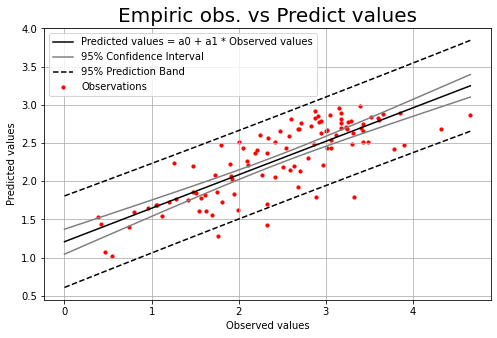

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

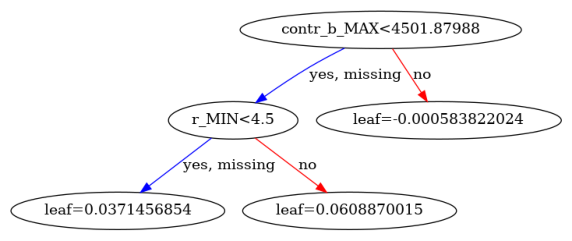

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

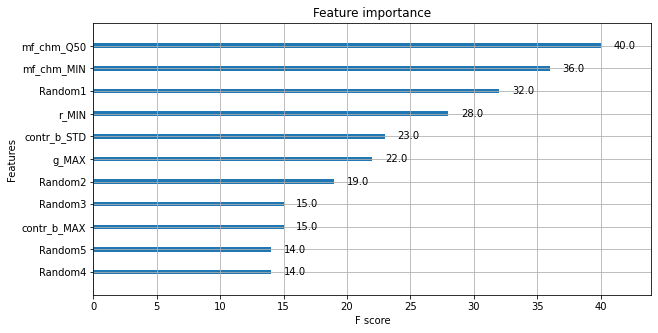

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

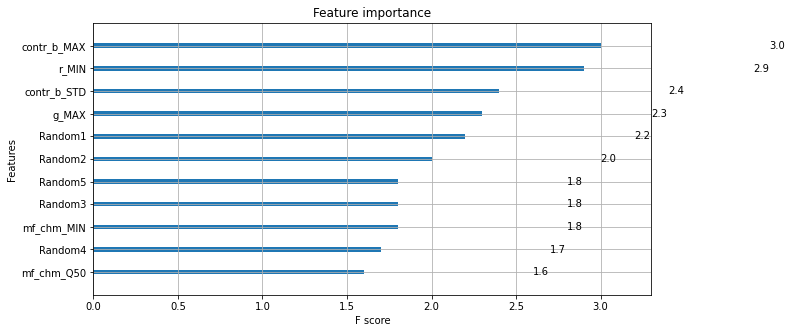

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

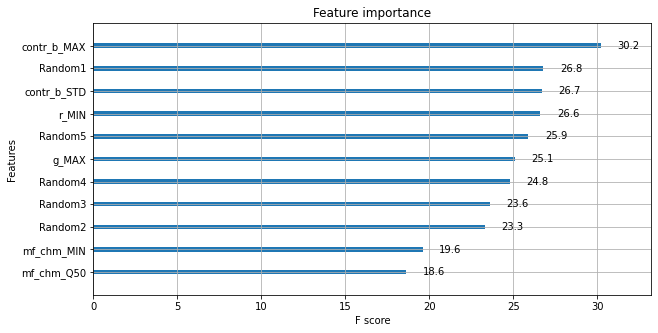

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


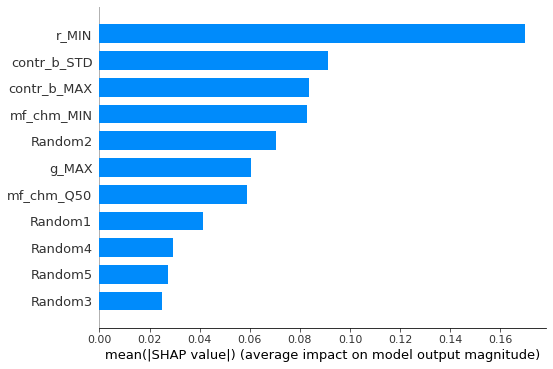

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

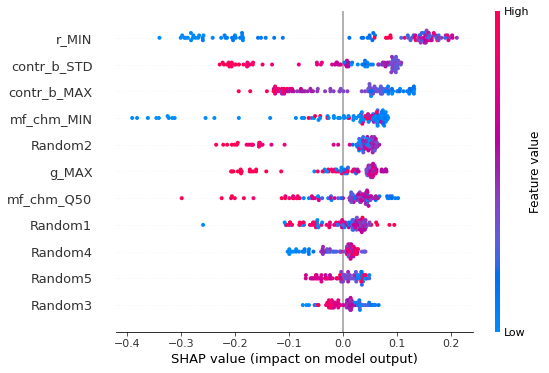

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

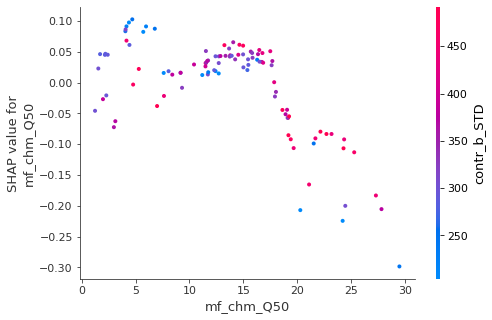

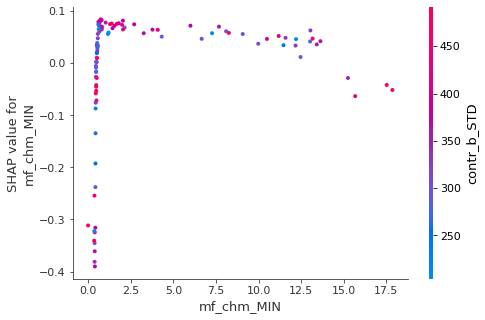

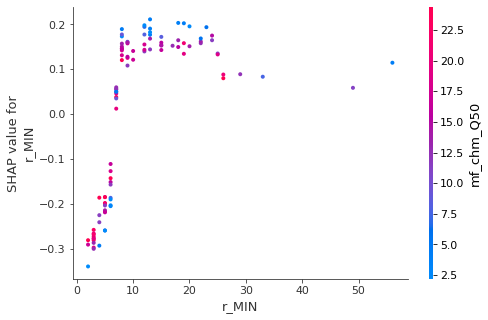

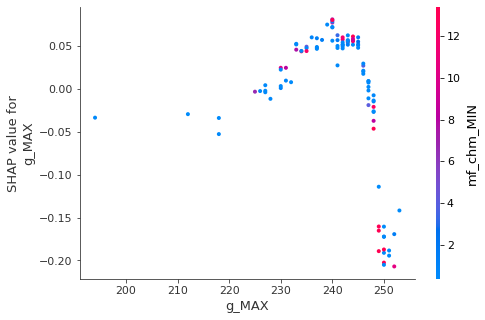

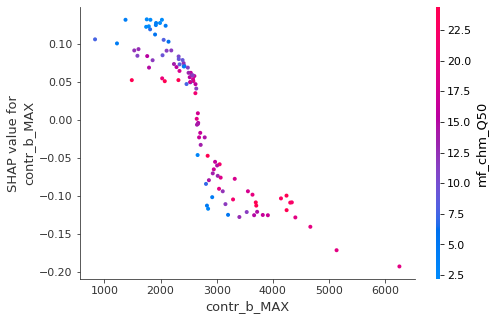

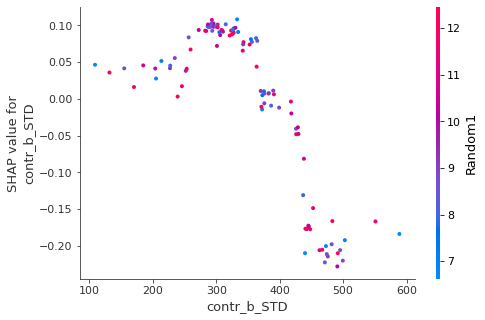

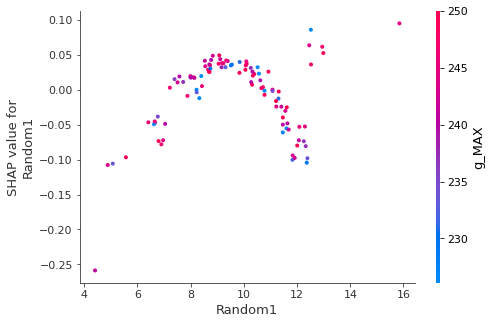

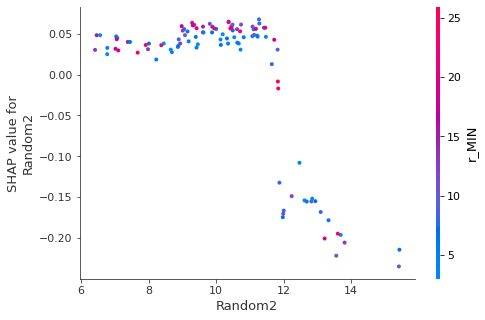

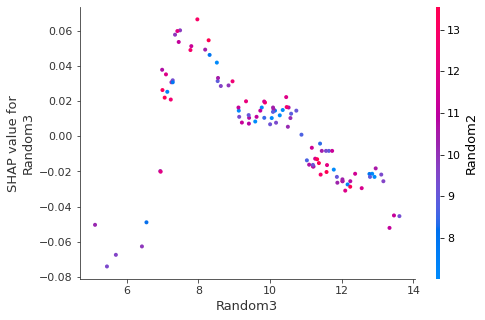

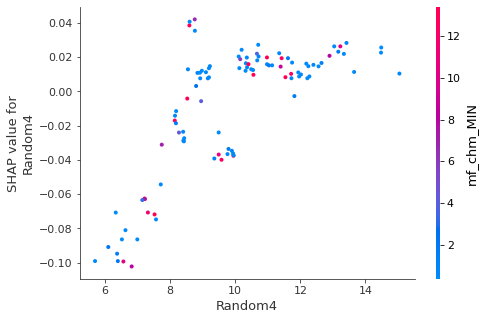

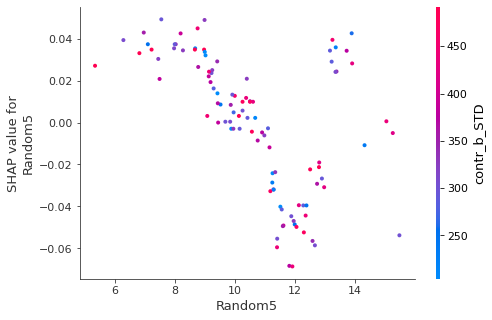

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")